In [61]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, img_as_ubyte, color
from skimage.filters import threshold_multiotsu
from sklearn.mixture import GaussianMixture as GMM
# Read images
!wget "https://images.squarespace-cdn.com/content/v1/5e2803765b739101d3ba4277/1596954629362-JWSVAKC0KMAS4EZVPWK5/Kidney%2BCancer%2BCoronal%2BCT.jpg"
# read the image of a plant seedling as grayscale from the outset
img3 = io.imread("Kidney+Cancer+Coronal+CT.jpg")
#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy
image2 = color.rgb2gray(img3)

# Convert MxNx3 image into Kx3 where K=MxN
img4 = img3.reshape((-1,3))  #-1 reshape means, in this case MxN


--2022-02-14 18:48:48--  https://images.squarespace-cdn.com/content/v1/5e2803765b739101d3ba4277/1596954629362-JWSVAKC0KMAS4EZVPWK5/Kidney%2BCancer%2BCoronal%2BCT.jpg
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22508 (22K) [image/jpeg]
Saving to: ‘Kidney+Cancer+Coronal+CT.jpg.2’

Kidney+Cancer+Coron 100%[===================>]  21.98K  --.-KB/s    in 0.001s  

2022-02-14 18:48:48 (21.6 MB/s) - ‘Kidney+Cancer+Coronal+CT.jpg.2’ saved [22508/22508]



-1660669.8830515805


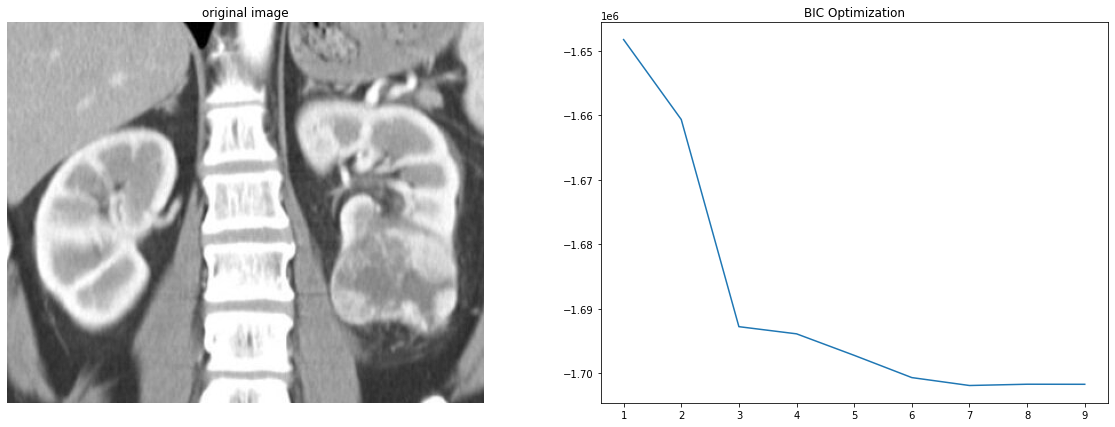

In [63]:
#In order to find the optimal number of clusters we can uses either AIC/BIC
#Bayesian information criterion (BIC) is the function that I used here.


n = 2
n_components = np.arange(1,10)

gmm_model2 = GMM(n, covariance_type='tied').fit(img4)

bic_values = gmm_model2.bic(img4)
print(bic_values)


gmm_models2 = [GMM(n, covariance_type='tied').fit(img4) for n in n_components]
#Let us look at input image and BIC optimization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))


# Plotting the original image.
ax[0].imshow(image2, cmap='gray')
ax[0].set_title('original image')
ax[0].axis('off')


# Plotting the 2nd image.
ax[1].plot(n_components, [m.bic(img4) for m in gmm_models2], label='BIC')
ax[1].set_title('BIC Optimization')
#ax[1].axis('off')
#ax[1].xlabel('n_components')


plt.subplots_adjust()

plt.show()


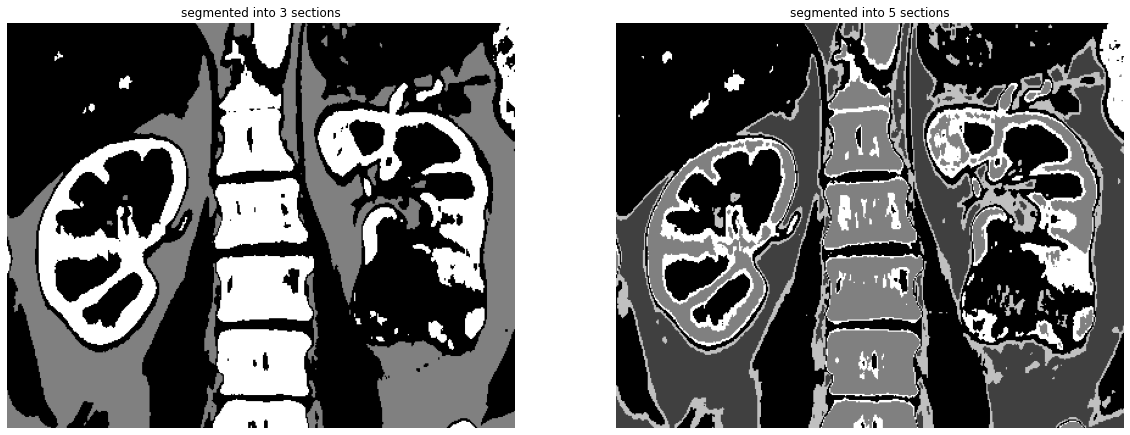

In [66]:
"""Gaussian segmentation with 3 and 5 sections numbers that seems to be fine according to BIC segmentation"""

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=3, covariance_type='tied').fit(img4)  #tied works better than full
gmm_labels = gmm_model.predict(img4)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img3.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])


#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=5, covariance_type='tied').fit(img4)  #tied works better than full
gmm_labels = gmm_model.predict(img4)

#Put numbers back to original shape so we can reconstruct segmented image
segmented2 = gmm_labels.reshape(original_shape[0], original_shape[1])



#Let us look at 2 input images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 25))

# Plotting the 1st image.
ax[0].imshow(segmented, cmap='gray')
ax[0].set_title('segmented into 3 sections')
ax[0].axis('off')

# Plotting the 2nd image.
ax[1].imshow(segmented2, cmap='gray')
ax[1].set_title('segmented into 5 sections')
ax[1].axis('off')
plt.subplots_adjust()

plt.show()
